In [31]:
# This is the solution to Problem 6 of Assignment 1 by Shrey Mehta (200580)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
%matplotlib inline

In [32]:
x = [-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.62]
y = [1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51]

In [33]:
def input_map(phi, x):
    a = []
    for i in range(0, len(x)):
        b = []
        for j in range(0, phi+1):
            b.append(x[i]**j)
        a.append(b)
    return np.array(a)

In [34]:
models = [1, 2, 3 ,4]

Part 1 : Computing the Posterior

In [35]:
def posterior(X, Y, beta, phi):
    mean = np.linalg.inv(X.T.dot(X) + (1/beta)*np.identity(X.shape[1])).dot(X.T).dot(Y)  # Calculate the mean of the distribution
    cov = np.linalg.inv(beta*X.T.dot(X) + np.identity(X.shape[1]))  # Calculate the covariance matrix of the distribution
    Xi = np.linspace(-4, 4, 100)  # Generate 100 equally spaced numbers between -4 and 4
    rv = np.random.multivariate_normal(mean, cov, 10) # Generate 10 random samples from the distribution
    input_xi = input_map(phi, Xi)  # Generate the input matrix for the polynomial

    for i in range(10):
        plt.plot(Xi, input_xi.dot(rv[i]))  # Plot the 10 random samples drawn from the distribution
    plt.plot(x, y, 'ro')  # Plot the data points
    plt.title("Posterior distribution for k = " + str(phi) + " and beta = " + str(beta))  # Set the title of the plot
    plt.xlabel("X axis")  # Set the x-axis label
    plt.ylabel("Y axis")  # Set the y-axis label
    plt.savefig("P6_k" + str(phi) + "_beta" + str(beta) + ".png")  # Save the plot
    plt.show() # Show the plot

    return

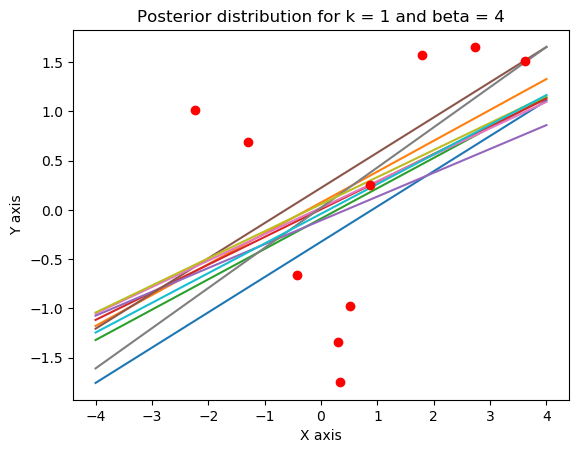

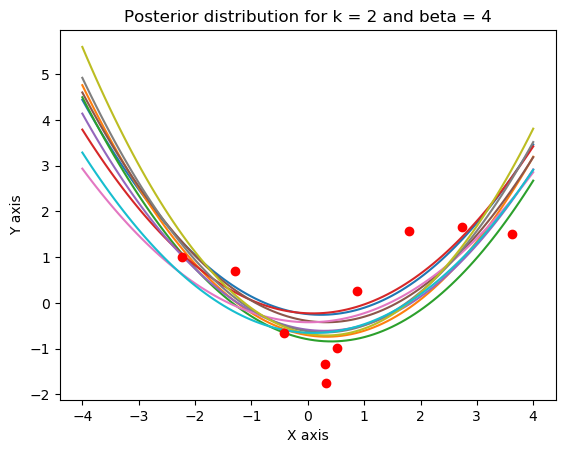

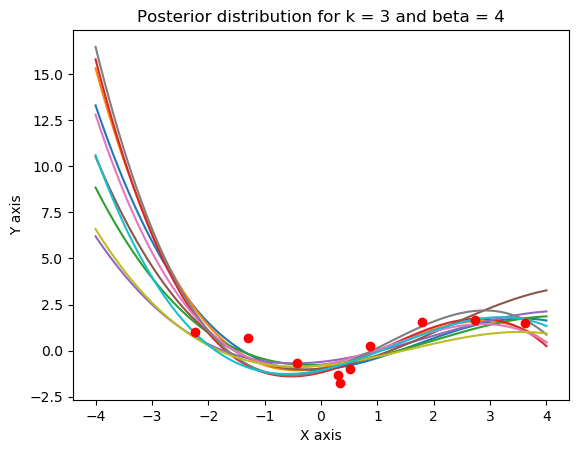

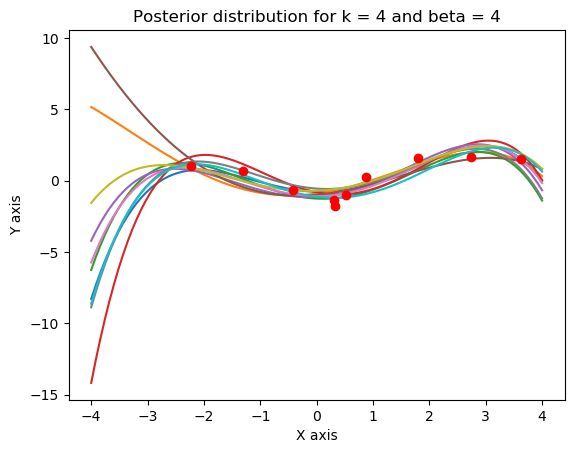

In [36]:
for k in range(1,5):
    posterior(input_map(k, x), y, 4, k)


Part 2: Computing the Mean of the Posterior Predictive

In [37]:
def pred_posterior(X, Y, beta, phi):
    mean = np.linalg.inv(X.T.dot(X) + (1/beta)*np.identity(X.shape[1])).dot(X.T).dot(Y)  # Calculate the mean of the distribution
    cov = np.linalg.inv(beta*X.T.dot(X) + np.identity(X.shape[1]))  # Calculate the covariance matrix of the distribution
    Xi = np.linspace(-4, 4, 100)  # Generate 100 equally spaced numbers between -4 and 4
    input_xi = input_map(phi, Xi)  # Generate the input matrix for the polynomial
    mean_pred_posterior = input_xi.dot(mean)  # Calculate the mean of the predictive posterior distribution
    standard_dev_pred_posterior = np.sqrt(np.diag(1/beta + input_xi.dot(cov).dot(input_xi.T)))  # Calculate the standard deviation of the predictive posterior distribution
    plt.plot(Xi, mean_pred_posterior)  # Plot the mean of the predictive posterior distribution
    plt.plot(Xi, mean_pred_posterior + 2*standard_dev_pred_posterior, 'r')  # Plot the upper bound of the predictive posterior distribution
    plt.plot(Xi, mean_pred_posterior - 2*standard_dev_pred_posterior, 'r')  # Plot the lower bound of the predictive posterior distribution
    plt.title("Mean of the predictive posterior distribution for k = " + str(phi) + " and beta = " + str(beta))  # Set the title of the plot
    plt.xlabel("X axis")  # Set the x-axis label
    plt.ylabel("Y axis")  # Set the y-axis label
    plt.savefig("P6_k" + str(phi) + "_beta" + str(beta) + "_pred_posterior.png")  # Save the plot
    plt.show()  # Show the plot

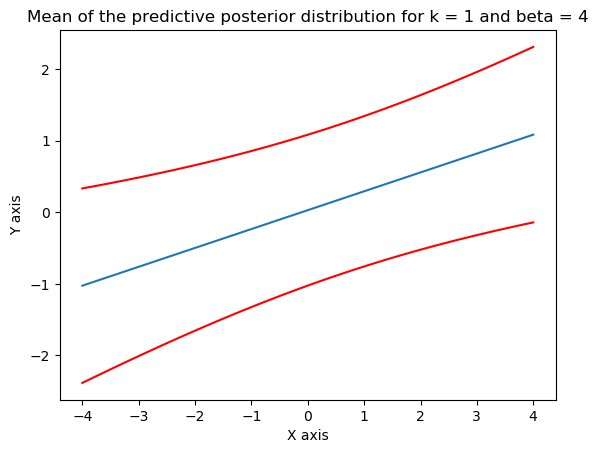

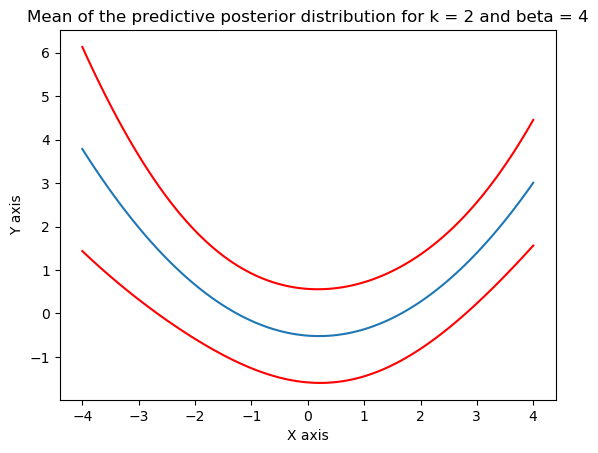

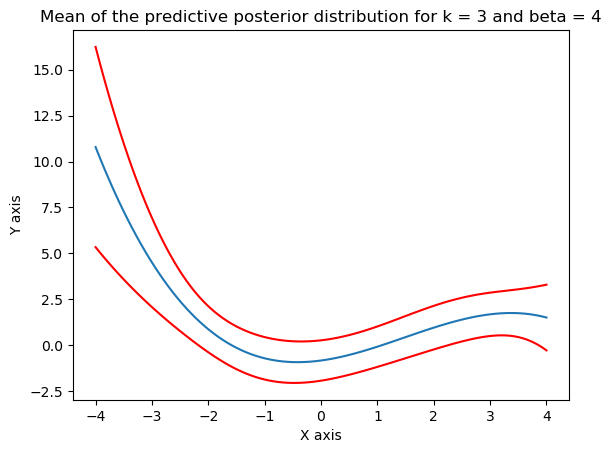

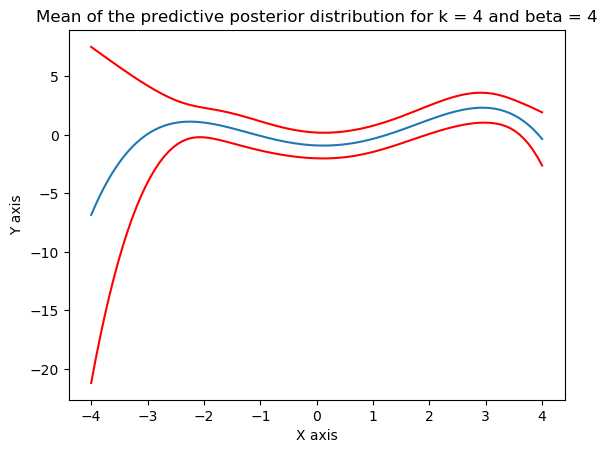

In [38]:
for k in range(1,5):
    pred_posterior(input_map(k, x), y, 4, k)

Part 3: Compute the Log Marginal Likelihood

In [39]:
def log_marginal_likelihood(X, y, beta, phi):
    mean_prior = np.zeros(X.shape[0])  # Set the mean of the prior distribution to 0
    cov_prior = (1/beta)*np.identity(X.shape[0]) + X.dot(X.T)  # Set the covariance matrix of the prior distribution to beta^-1*I
    # Using slide 17 of lecture 5, we get the following expression for the log marginal likelihood
    # integrating out over the weight w, and using the product of Gaussians, we get the above expression
    rv = multivariate_normal(mean_prior, cov_prior)  # Generate a multivariate normal distribution
    log_marginal_likelihood = rv.logpdf(y)  # Calculate the log marginal likelihood
    return log_marginal_likelihood

In [40]:
for k in range(1, 5):
    print("The log marginal likelihood for k = " + str(k) + " is " + str(log_marginal_likelihood(input_map(k, x), y, 4, k)))

The log marginal likelihood for k = 1 is -32.352015280445244
The log marginal likelihood for k = 2 is -22.77215317878222
The log marginal likelihood for k = 3 is -22.07907064224274
The log marginal likelihood for k = 4 is -22.386776180355803


Part 4: Calculating the MAP estimate

In [41]:
def map_estimate(X, y, beta, phi):
    mean = np.linalg.inv(X.T.dot(X) + (1/beta)*np.identity(X.shape[1])).dot(X.T).dot(y)  # Calculate the mean of the distribution
    cov = np.linalg.inv(beta*X.T.dot(X) + np.identity(X.shape[1]))  # Calculate the covariance matrix of the distribution 
    cov_weight = 1/beta*np.identity(X.shape[0])  # Calculate the covariance matrix of the likelihood distribution as per slide 13 lecture 5
    mean_weight = np.dot(X, mean)  # Calculate the mean of the likelihood distribution as per slide 13 lecture 5
    # The above mean is obtained by differentaiting the posterior distribution with respect to the weights and equating it to 0 
    # Differentiating (-0.5*(y-Xw)^T(I)^-1(y-Xw)-0.5*w^T(beta)^-1w+constant) wrt w and equating it to 0, we get the mean_weight
    rv = multivariate_normal(mean = mean_weight, cov = cov_weight)  # Generate a multivariate normal distribution
    log_likelihood = rv.logpdf(y)  # Calculate the log likelihood
    print("The log likelihood for k = " + str(k) + " is " + str(log_likelihood))

In [42]:
for k in range(1,5):
    map_estimate(input_map(k, x), y, 4, k)

The log likelihood for k = 1 is -28.094004379075553
The log likelihood for k = 2 is -15.360663659052214
The log likelihood for k = 3 is -10.935846883615739
The log likelihood for k = 4 is -7.22529125902858
